In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue

In [2]:
nrows = 100
ncols = 9

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame((np.random.weibull(7, ncols*nrows)*100).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])
#frame = pd.DataFrame(np.random.normal(loc=150, scale=25, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])
#frame = pd.DataFrame(np.random.randint(100,200,ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
series.blue.test.index

          Y           X investigate # data groups distribution                    test      bluebelt
   discrete    discrete           -             -            -         chi square test              
   discrete  continuous           -             -            -     logistic regression              
 continuous    discrete        mean             1       normal         1 sample t-test  one_sample_t
 continuous    discrete        mean             1   non-normal  1 sample Wilcoxon test      wilcoxon
 continuous    discrete        mean             2       normal         2 sample t-test  two_sample_t
 continuous    discrete        mean             2   non-normal       Mann-Whitney test  mann_whitney
 continuous    discrete        mean            >2       normal             1 way Anova         anova
 continuous    discrete        mean            >2   non-normal     Kruskal-Wallis test       kruskal
 continuous    discrete    variance             2       normal                  F-test     

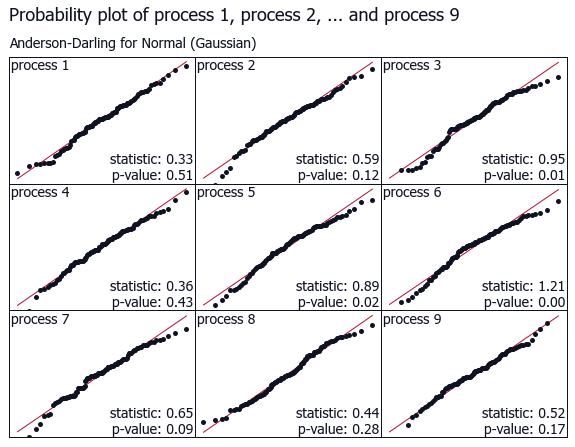

In [4]:
norm_dist = frame.blue.test.anderson_darling()
norm_dist.plot()

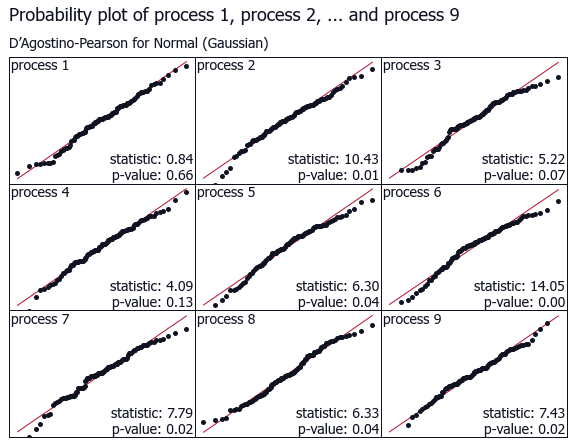

In [5]:
normal = frame.blue.test.normal_distribution()
normal.plot()

In [6]:
dagos = series.blue.test.dagostino_pearson()
dagos.p_value

0.18742592723551516

In [7]:
ad = series.blue.test.anderson_darling()
ad.p_value

0.06691075517409667

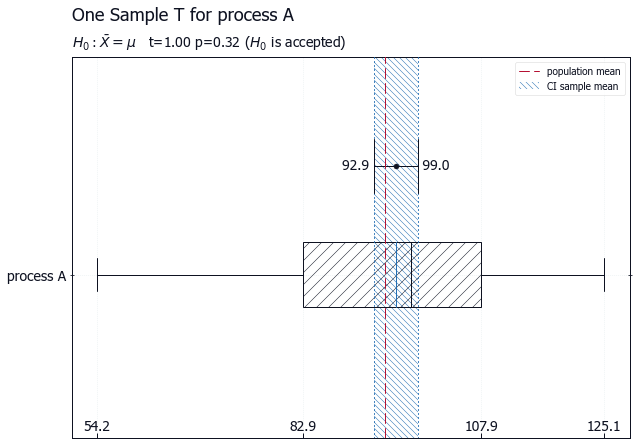

In [8]:
ost = series.blue.test.one_sample_t(popmean=94.4)
ost.plot()

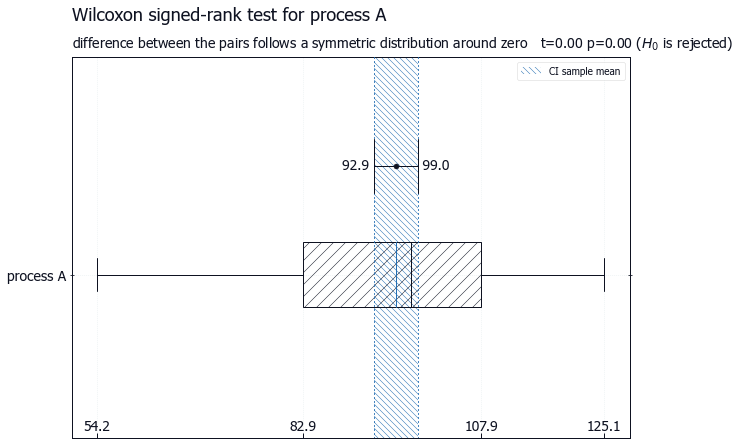

In [9]:
wilcoxon = series.blue.test.wilcoxon()
wilcoxon.plot()

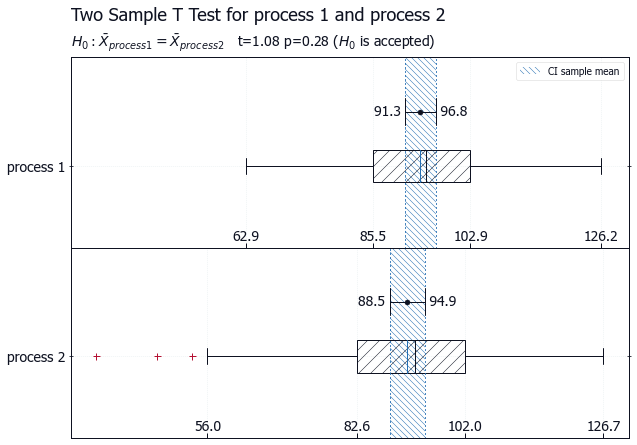

In [10]:
tst = frame.blue.test.two_sample_t(columns=['process 1', 'process 2'])
tst.plot()

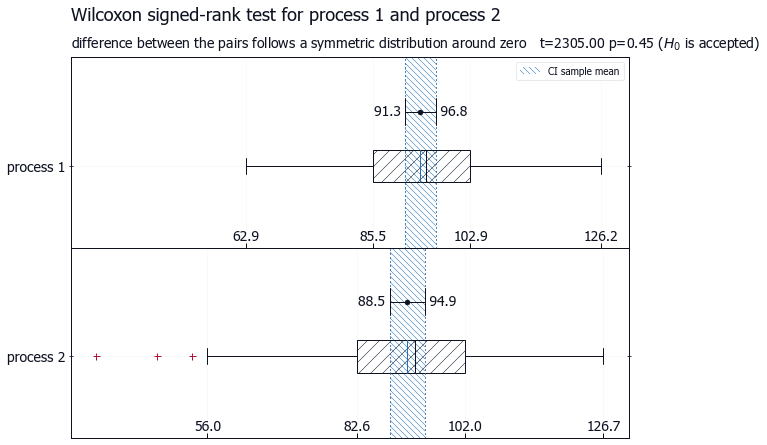

In [11]:
wilcoxon = frame.blue.test.wilcoxon(columns=['process 1', 'process 2'])
wilcoxon.plot()

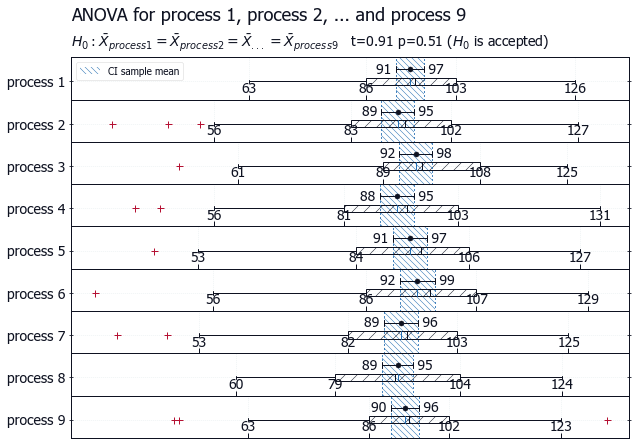

In [12]:
anova = frame.blue.test.anova()
anova.plot(digits=2)

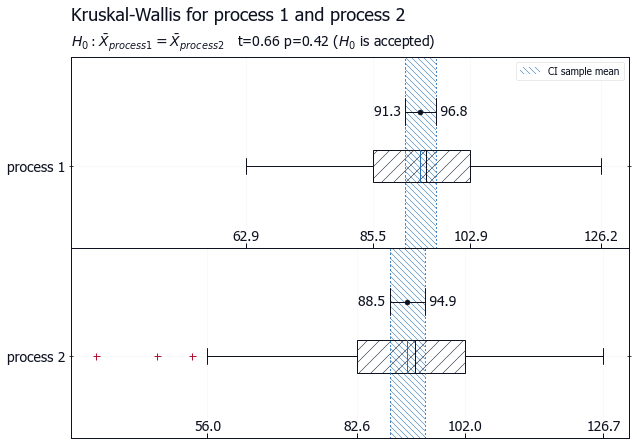

In [13]:
kruskal = frame.blue.test.kruskal_wallis(columns=['process 1', 'process 2'])
kruskal.plot()

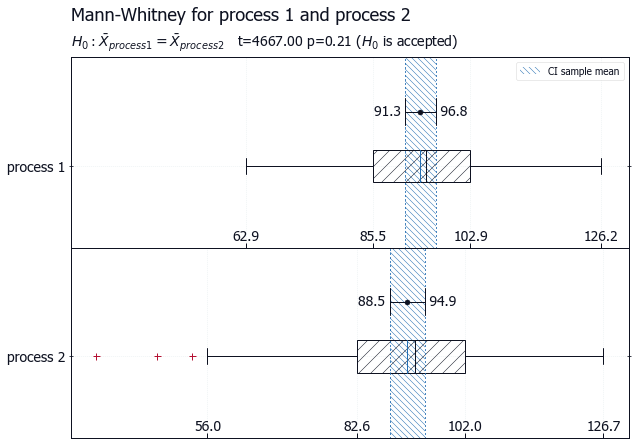

In [14]:
mann_whitney = frame.blue.test.mann_whitney(columns=['process 1', 'process 2'])
mann_whitney.plot()

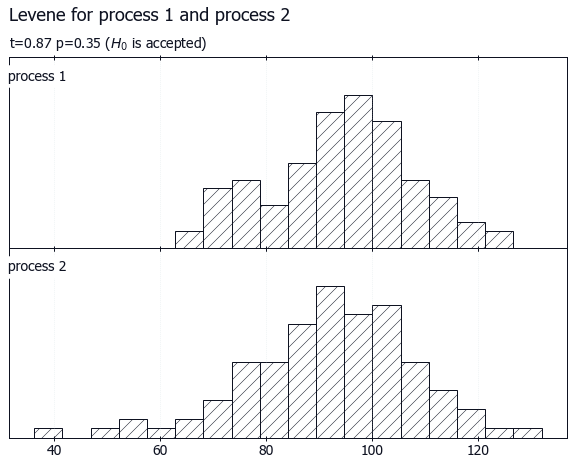

In [15]:
levene = frame.blue.test.levene(columns=['process 1', 'process 2'])
levene.plot()

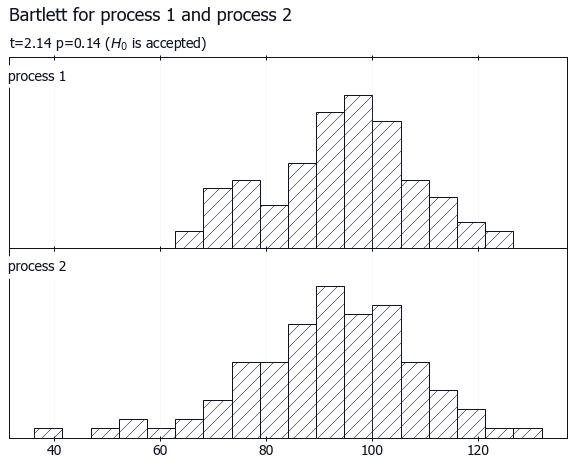

In [16]:
bartlett = frame.blue.test.bartlett(columns=['process 1', 'process 2'])
bartlett.plot()

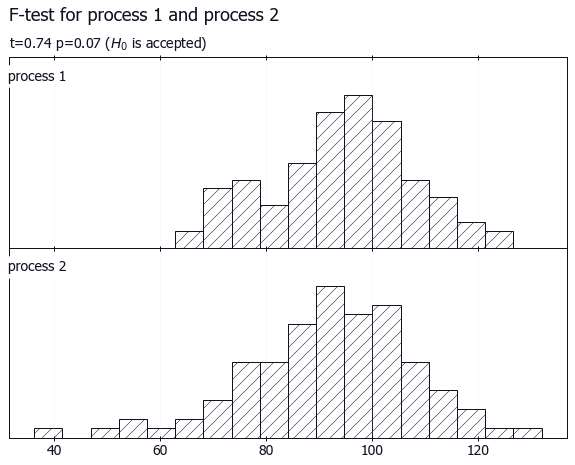

In [17]:
f = frame.blue.test.f_test(columns=['process 1', 'process 2'])
f.plot()

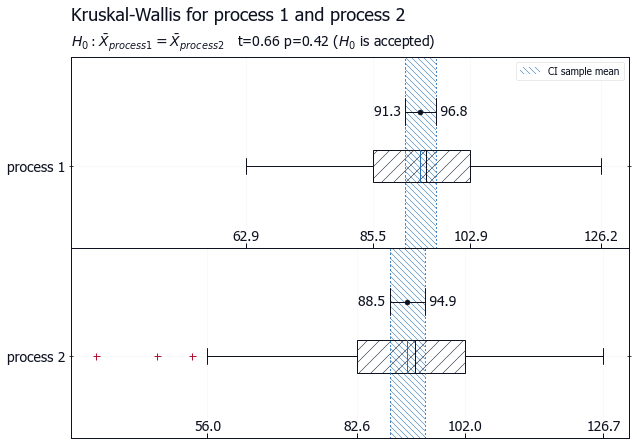

In [18]:
equal_means = frame.blue.test.equal_means(columns=['process 1', 'process 2'])
equal_means.plot()

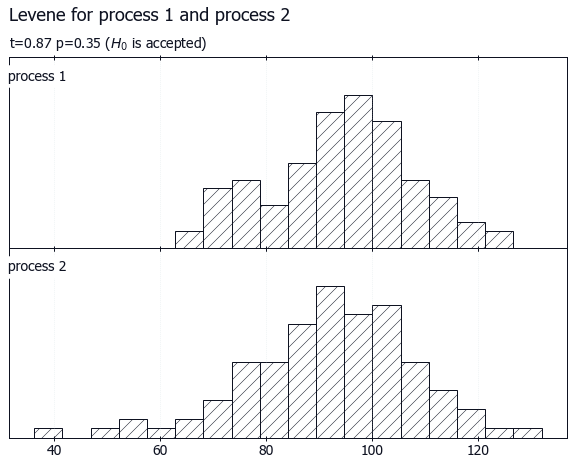

In [19]:
equal_variance = frame.blue.test.equal_variance(columns=['process 1', 'process 2'])
equal_variance.plot()

In [20]:
norm_dist.p_value

0.0032300860112221344

In [24]:
kruskal.help


    apply the Kruskal-Wallis test on a pandas dataframe with the columns as groups to compare
    Returns the scipy KruskalResult; statistic, pvalue
    pvalue >= alpha (default 0.05) : columns have equal means
    pvalue < alpha: columns don't have equal means
    
